### *Capstone- Data Import Exercise*

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns # Visualisation

%matplotlib inline
sns.set(color_codes=True)

### *Exploring the CSV files*

In [2]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\Production-Data.csv'
uploaded_df = pd.read_csv(file_path)

In [3]:
uploaded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SKU                    9487 non-null   int64  
 1   SKU_DESCRIPTION        9487 non-null   object 
 2   BATCHID                9487 non-null   int64  
 3   Recipe                 9487 non-null   object 
 4   Tank                   9487 non-null   object 
 5   Unit                   9487 non-null   object 
 6   Instruction_Step       9462 non-null   object 
 7   Source                 9487 non-null   object 
 8   Material_ID            2443 non-null   object 
 9   Material_Name          1980 non-null   object 
 10  Quantity               9487 non-null   float64
 11  Phase_start            9487 non-null   object 
 12  Phase_end              9487 non-null   object 
 13  Phase_duration         9487 non-null   int64  
 14  Phase_start_delay      9487 non-null   int64  
 15  Phas

## Data Preprocessing - Removal of unwanted columns and renaming columns

In [4]:
# rename the existing DataFrame (rather than creating a copy)
uploaded_df.rename(columns={'SKU': 'Material','Unit':'Tank_1',}, inplace=True)

In [5]:
uploaded_df.info

<bound method DataFrame.info of       Material                           SKU_DESCRIPTION    BATCHID  \
0      1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107643491   
1      1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107643491   
2      1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107643491   
3      1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107643491   
4      1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107643491   
...        ...                                       ...        ...   
9482   3055706                      BCH LE/A/B-809.00 P2  107737576   
9483   3055706                      BCH LE/A/B-809.00 P2  107737576   
9484   3055706                      BCH LE/A/B-809.00 P2  107737576   
9485   3055706                      BCH LE/A/B-809.00 P2  107737576   
9486   3055706                      BCH LE/A/B-809.00 P2  107737576   

                                                 Recipe  Tank    Tank_1  \
0     10166969:P_BBS25_50171888_00\EM_25

In [6]:
# Removal of unwanted columns from dataset
uploaded_df1=uploaded_df.drop(['SKU_DESCRIPTION', 'Recipe','Source','Tank', 'Batch_Phase_Type'], axis=1)

In [7]:
# Define a dictionary of replacements
replacements = {
    'U_25MT02': '2502',
    'U_25MT03': '2503',
    'U_25MT04': '2504',
    'U_26MT01' : '2601',
    'U_23MT02' : '2302',
    'U_23MT04' : '2304',
    'U_25MT01' : '2501',
    'U_23MT05' : '2305',
    'U_25MT02' : '2502',
    'U_22MT04' : '2204',
    'U_22MT03' : '2203',
    'U_22MT02' : '2202',
    'U_26MT04' : '2604',
    'U_26MT03' : '2603',
    'U_23MT03' : '2303',
    'U_22MT05' : '2205'
}

# Replace values in the 'TankName' column
uploaded_df1['Tank_1'].replace(replacements, inplace=True)

# Print the modified DataFrame
print(uploaded_df1)

      Material    BATCHID Tank_1  \
0      1002150  107643491   2503   
1      1002150  107643491   2503   
2      1002150  107643491   2503   
3      1002150  107643491   2503   
4      1002150  107643491   2503   
...        ...        ...    ...   
9482   3055706  107737576   2502   
9483   3055706  107737576   2502   
9484   3055706  107737576   2502   
9485   3055706  107737576   2502   
9486   3055706  107737576   2502   

                                   Instruction_Step Material_ID  \
0                              S3_BATCH_IN_PROGRESS         NaN   
1                                        STEP1_CONS     1002565   
2                       PLEASE VERIFY BULK ADDITION         NaN   
3                                        STEP1_CONS     1037802   
4                                        STEP1_CONS     1002818   
...                                             ...         ...   
9482               TAKE A SAMPLE AND SUBMIT FOR QA.         NaN   
9483  SAMPLE TO LAB. RESULTS OK

In [19]:
# Create A new csv file with tank names updated  
uploaded_df1.to_csv('C:/Users/User/Desktop/Thesis 2023/Capstone---CCT/Python Working Notebooks/ProductionDataupdated.csv')

## Determining the Tank Quantities available 

In [8]:
#Select all the rows where the phase HP is in the list below - HP is homogenisation of the final batch quantity
Instruction_Step = ['HP']
df_TankQuantity = uploaded_df[uploaded_df['Instruction_Step'].isin(Instruction_Step)]
print(df_TankQuantity)

      Material                           SKU_DESCRIPTION    BATCHID Recipe  \
11     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107643491     HP   
16     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107643491     HP   
38     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107762133     HP   
43     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107762133     HP   
65     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107829859     HP   
...        ...                                       ...        ...    ...   
9424   3044756                         BCH LE/B-12.00 P2  107940278     HP   
9446   3044756                         BCH LE/B-12.00 P2  108041496     HP   
9451   3044756                         BCH LE/B-12.00 P2  108041496     HP   
9474   3055706                      BCH LE/A/B-809.00 P2  107737576     HP   
9479   3055706                      BCH LE/A/B-809.00 P2  107737576     HP   

      Tank    Tank_1 Instruction_Step Source Material_ID Materi

In [10]:
# Group data by tank names and calculate average Quantity
TankQuantity_df = df_TankQuantity.groupby('Tank_1')['Quantity'].mean().reset_index()
TankQuantity_df

,Tank_1,Quantity
0,U_22MT01,18258.020125
1,U_22MT02,17442.148714
2,U_22MT03,17516.904545
3,U_22MT04,18313.822955
4,U_22MT05,16892.826667
5,U_23MT01,18317.464529
6,U_23MT02,18748.671826
7,U_23MT03,18633.034176
8,U_23MT04,18625.372000
9,U_23MT05,18769.750146


In [ ]:
#Group by the 'Material','Material_Name' column
#Ingredient_df = uploaded_df.groupby(['Material_ID','Unit','BATCHID'])
#Ingredient_df.head()

## Determining the effect of Tank Quantity on the Phase Overrun times per Production Tank

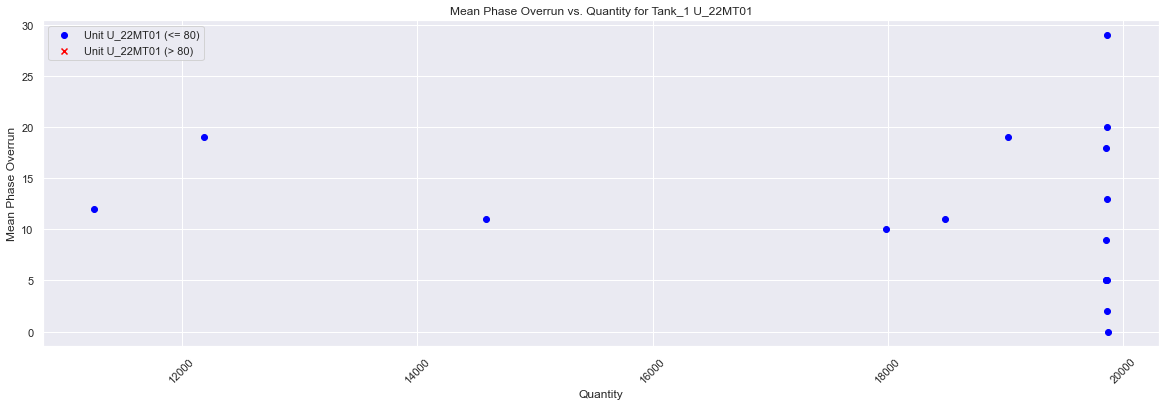

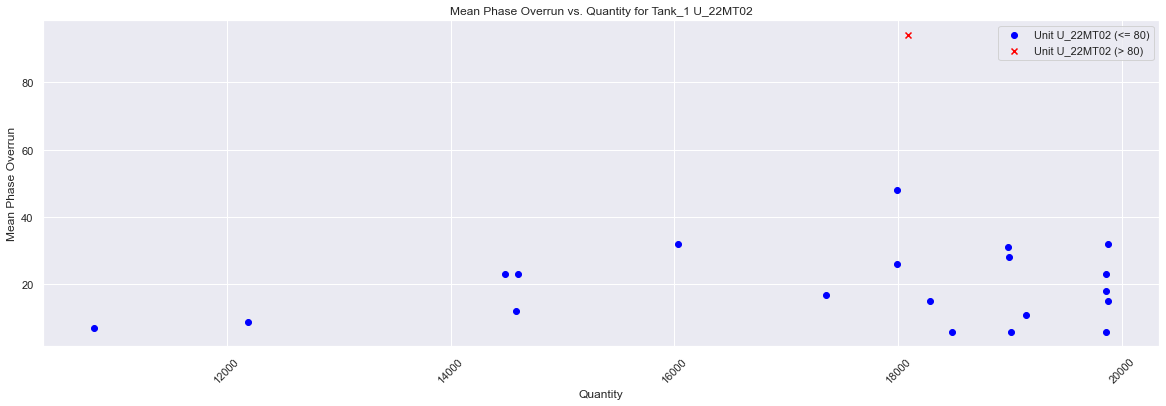

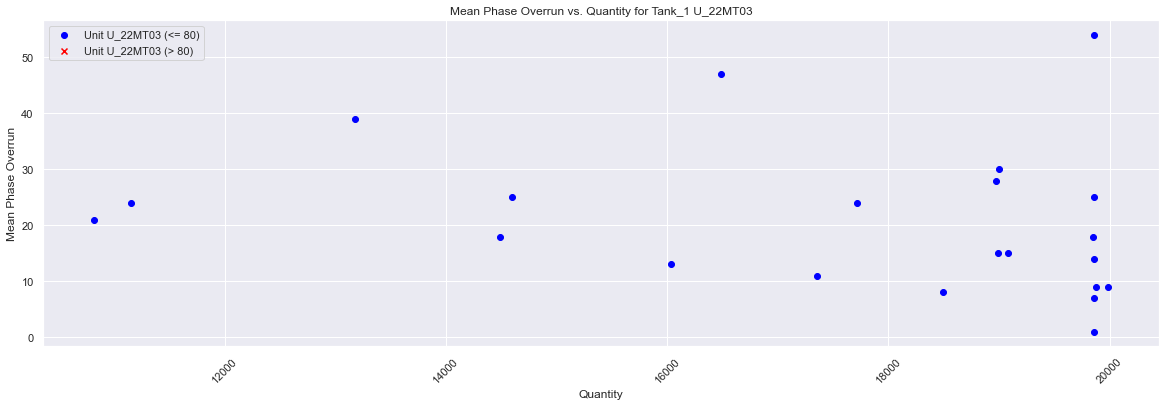

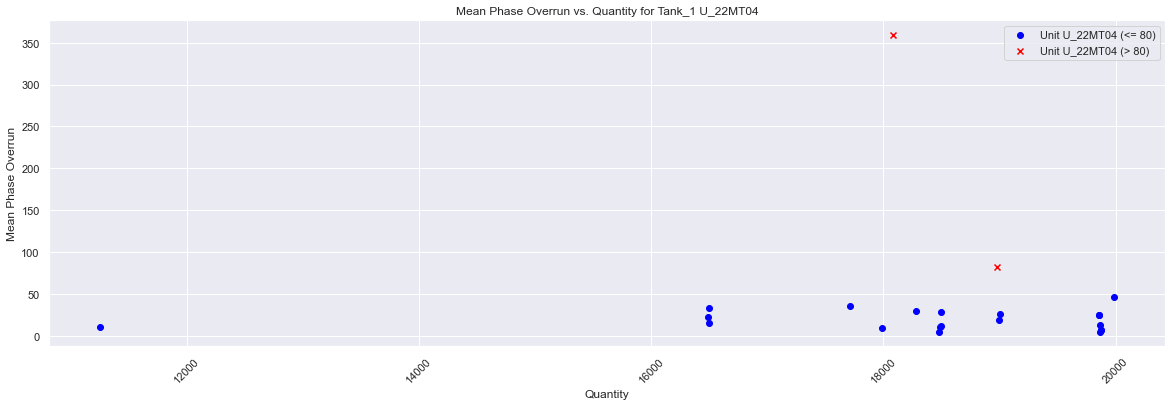

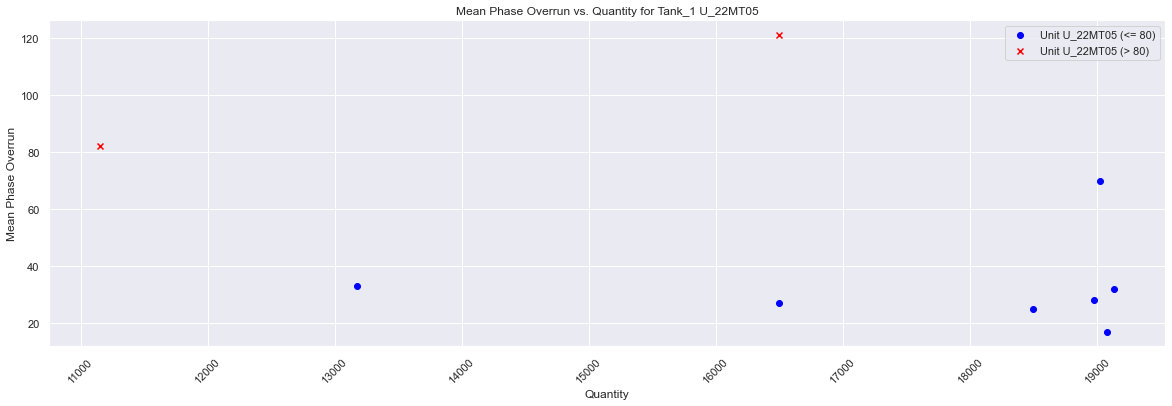

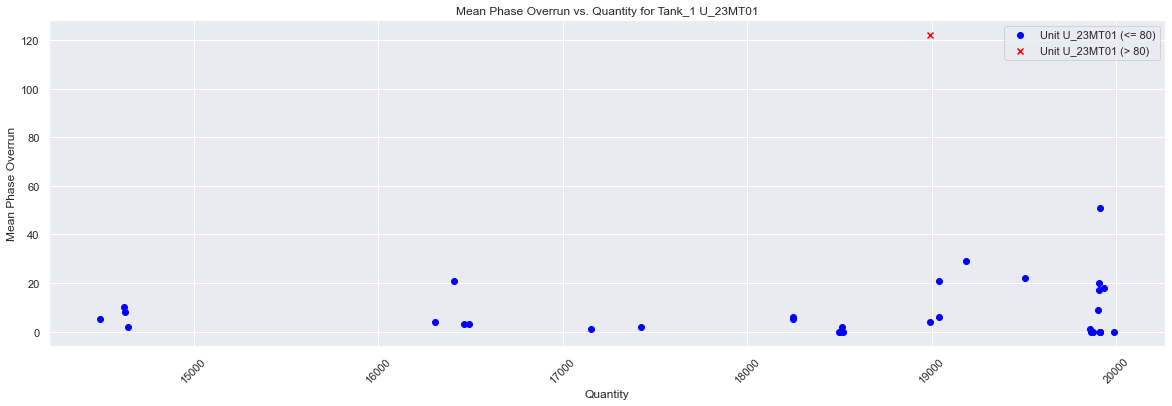

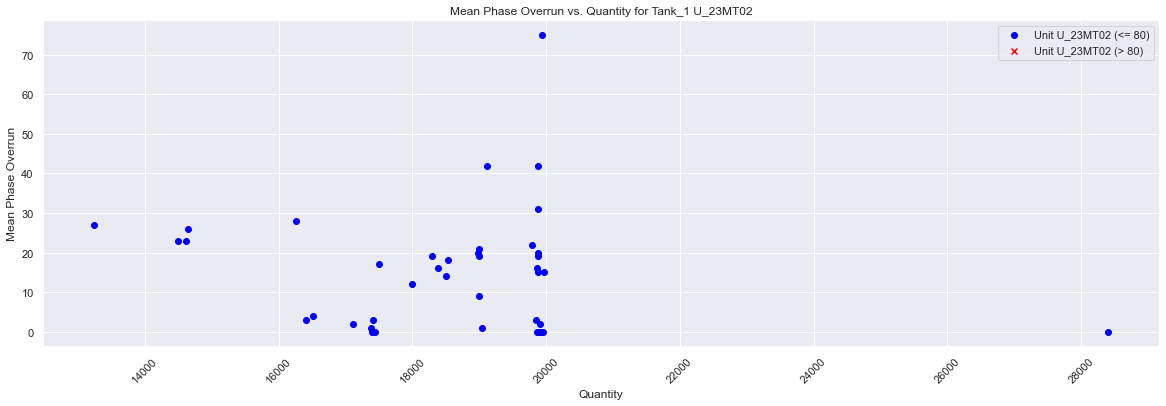

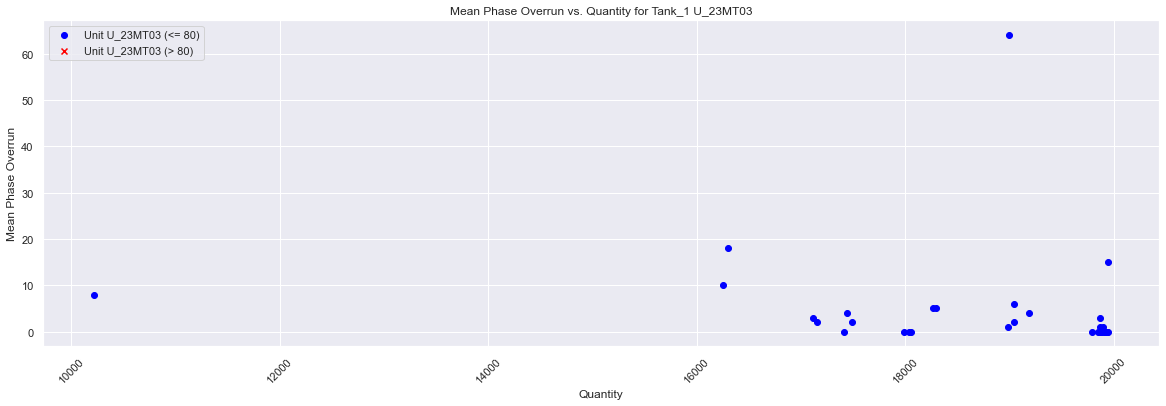

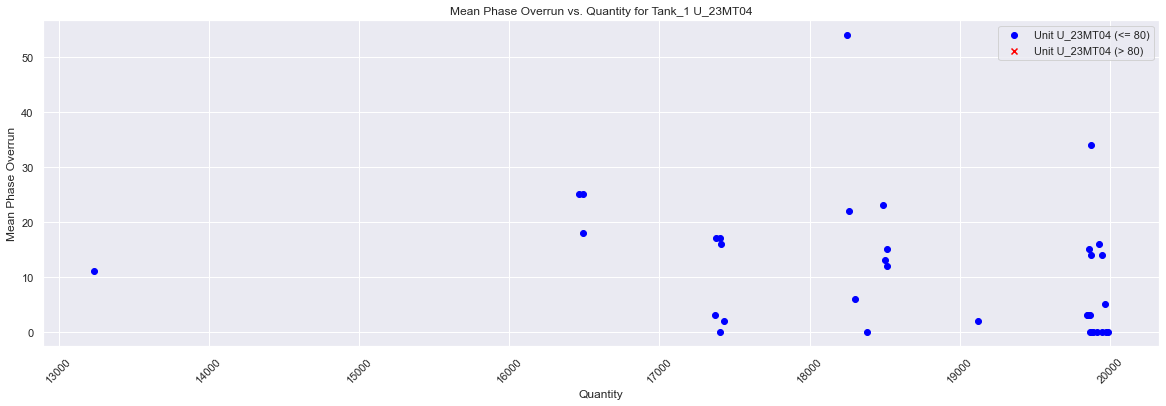

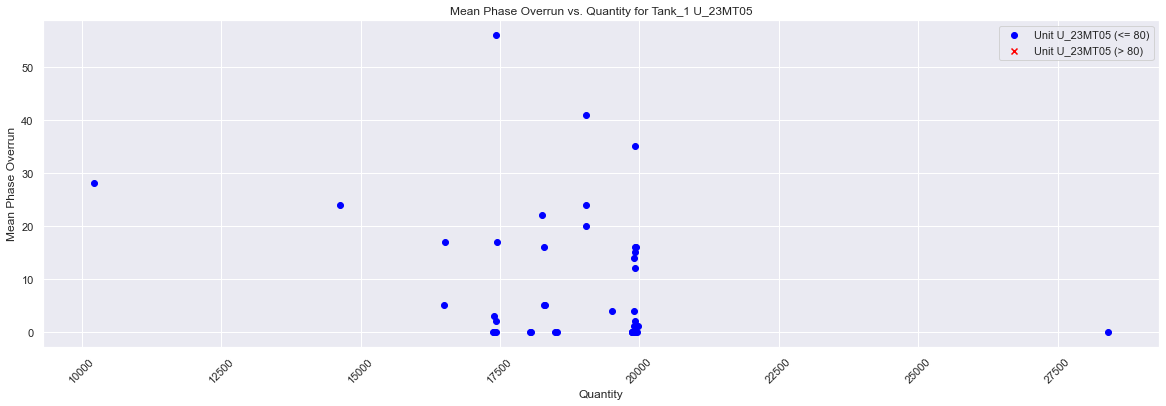

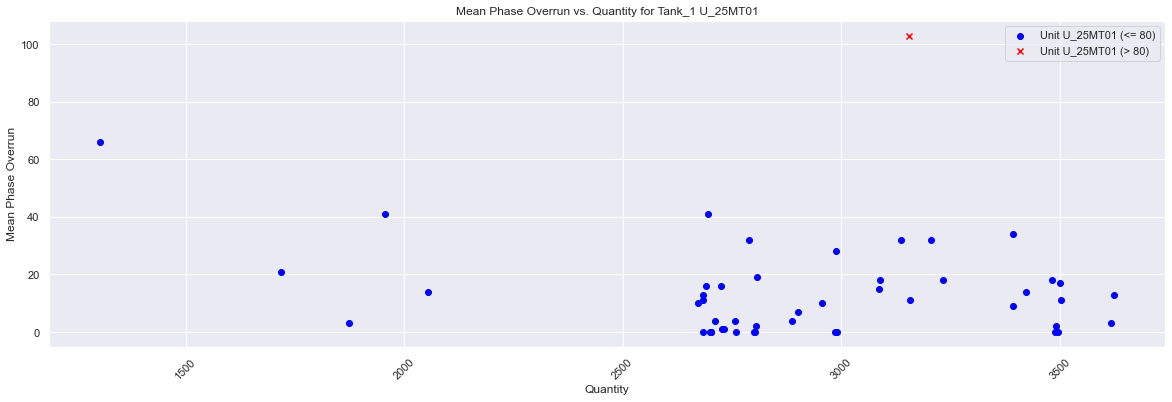

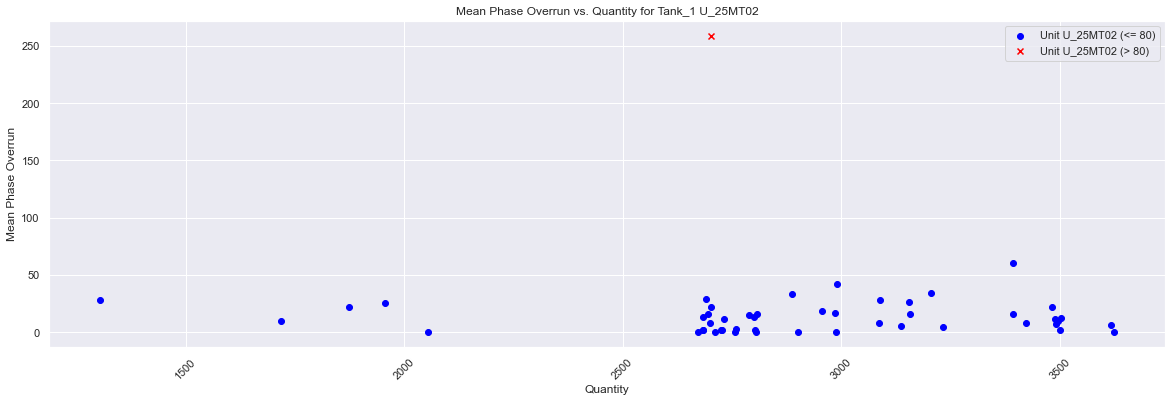

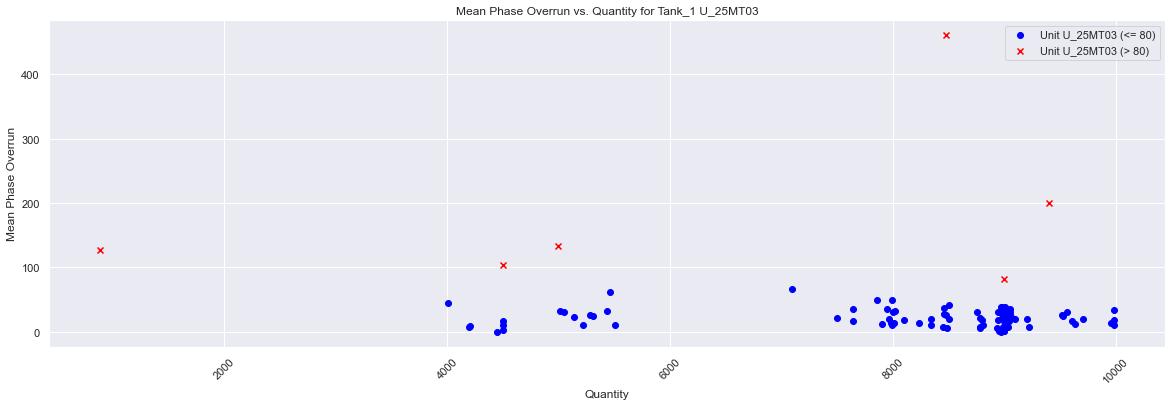

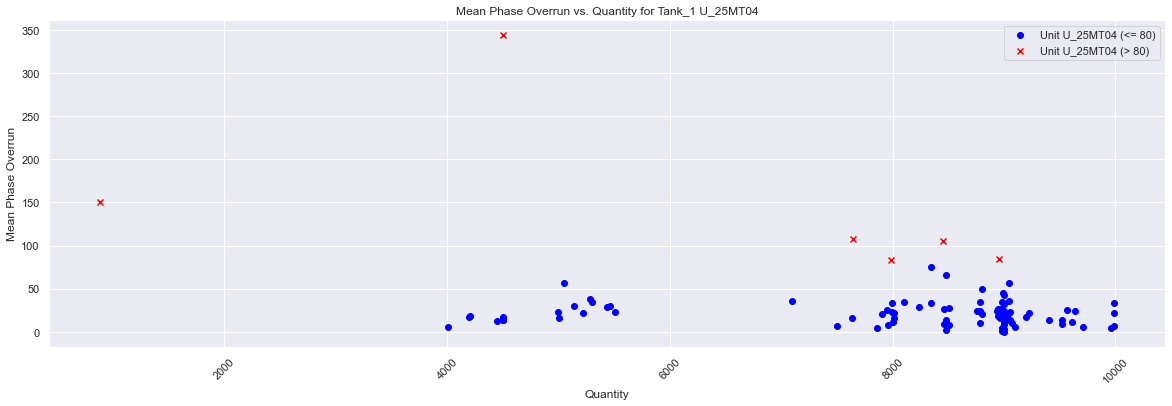

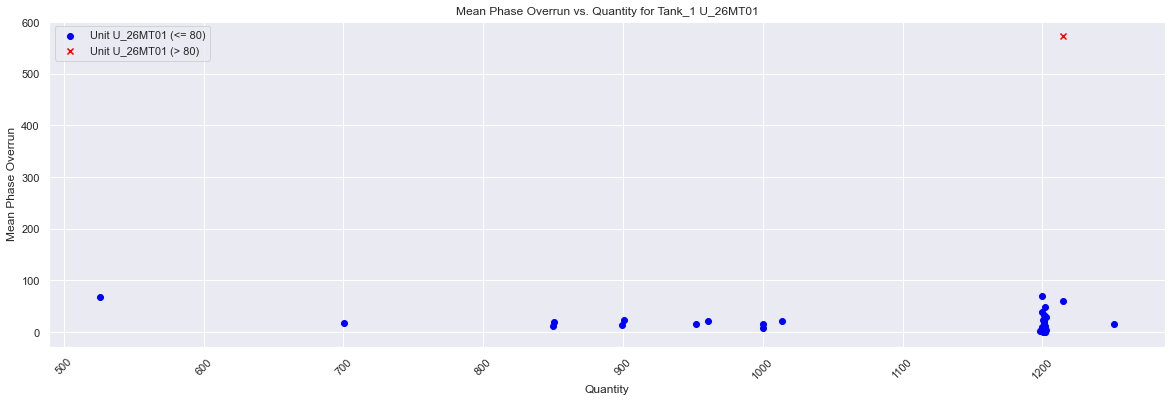

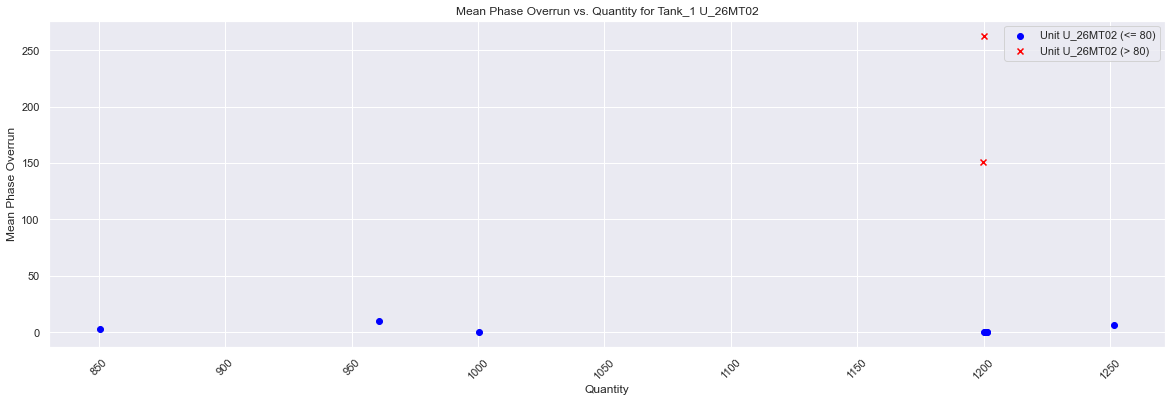

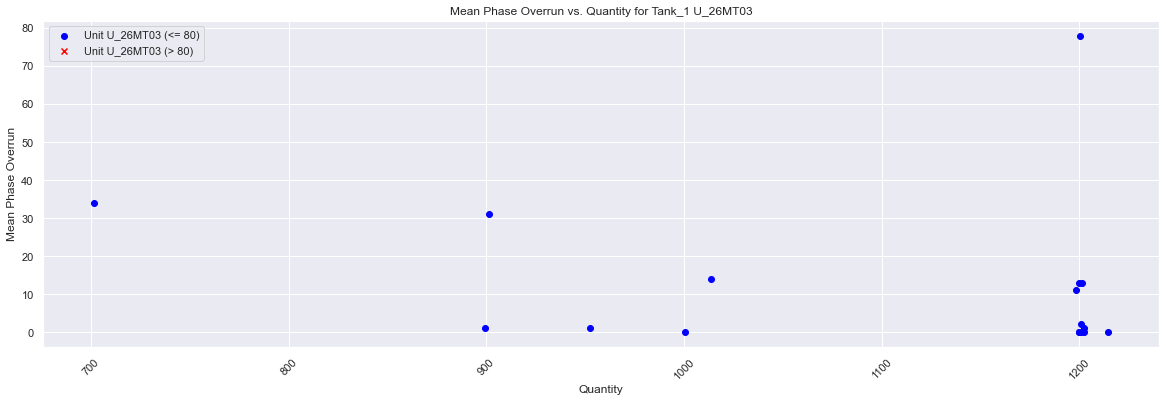

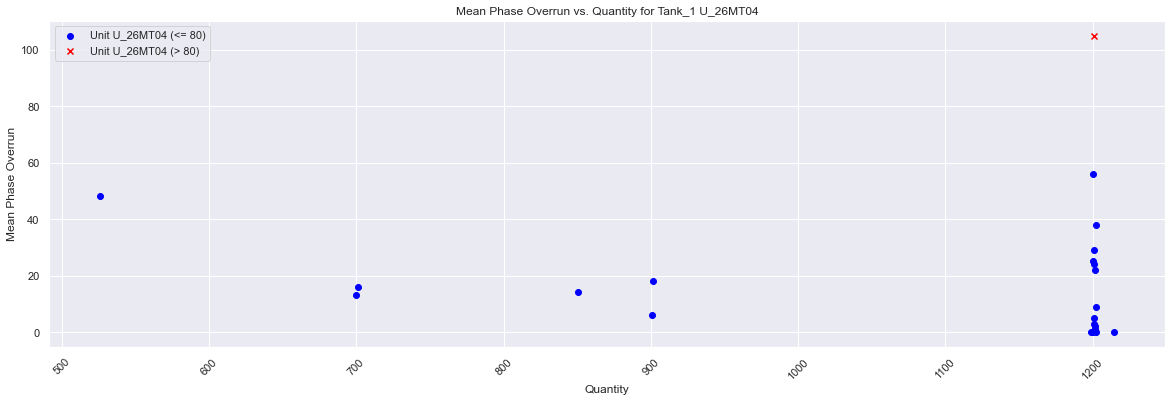

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(df_TankQuantity)

# Group data by 'unit' and calculate the mean phase overrun for each unit and material combination
grouped_data = df.groupby(['Tank_1','Quantity'])['Phase_overrun'].mean().reset_index()

# Define the threshold value above which points will be colored differently
threshold = 80  # Adjust this value as needed

# Create a separate plot for each unit
units = grouped_data['Tank_1'].unique()
for Unit in units:
    unit_data = grouped_data[grouped_data['Tank_1'] == Unit]
    
    plt.figure(figsize=(20, 6))
    
    # Scatter plot for points below threshold
    plt.scatter(unit_data[unit_data['Phase_overrun'] <= threshold]['Quantity'],
                unit_data[unit_data['Phase_overrun'] <= threshold]['Phase_overrun'],
                label=f'Unit {Unit} (<= {threshold})', color='blue')
    
    # Scatter plot for points above threshold
    plt.scatter(unit_data[unit_data['Phase_overrun'] > threshold]['Quantity'],
                unit_data[unit_data['Phase_overrun'] > threshold]['Phase_overrun'],
                label=f'Unit {Unit} (> {threshold})', color='red', marker='x')
    
    plt.xlabel('Quantity')
    plt.ylabel('Mean Phase Overrun')
    plt.title(f'Mean Phase Overrun vs. Quantity for Tank_1 {Unit}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

## Determining the effect of ingredient type addition on the Phase Overrun times per Production Tank

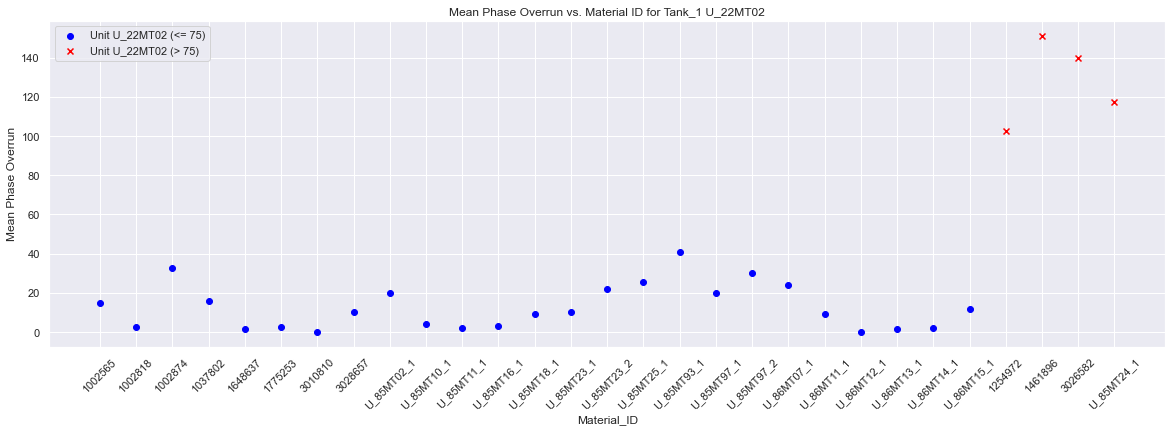

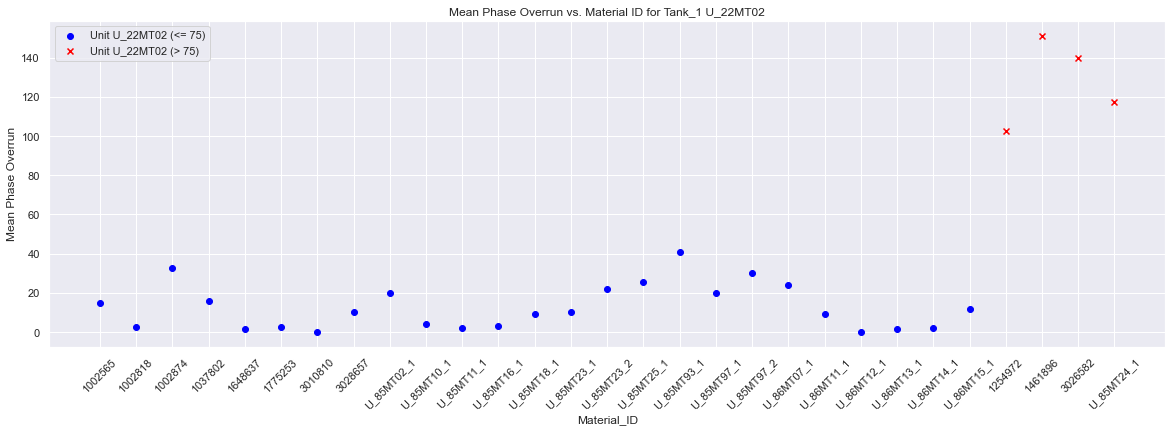

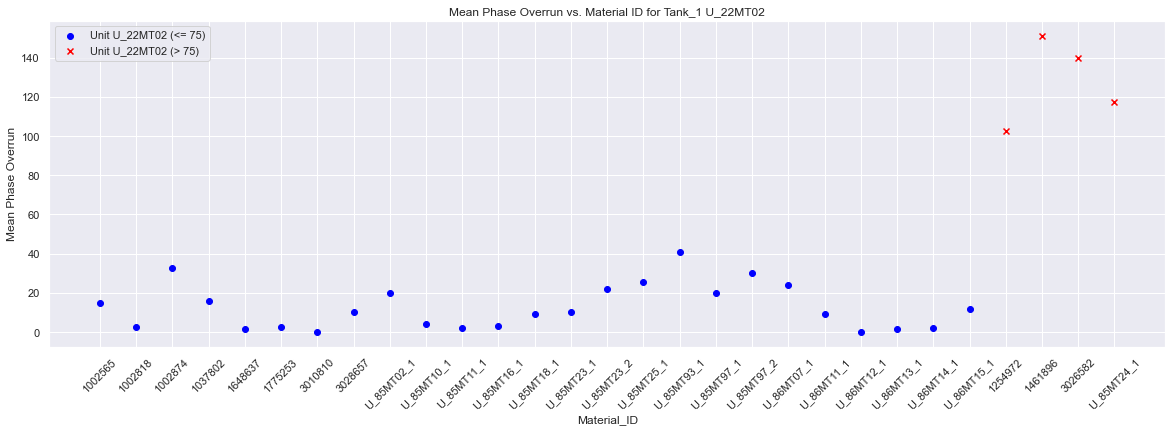

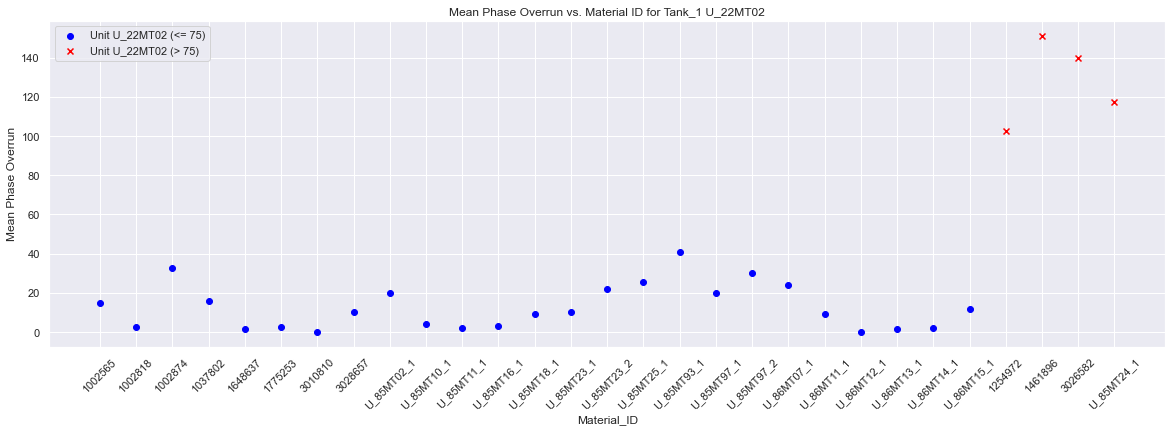

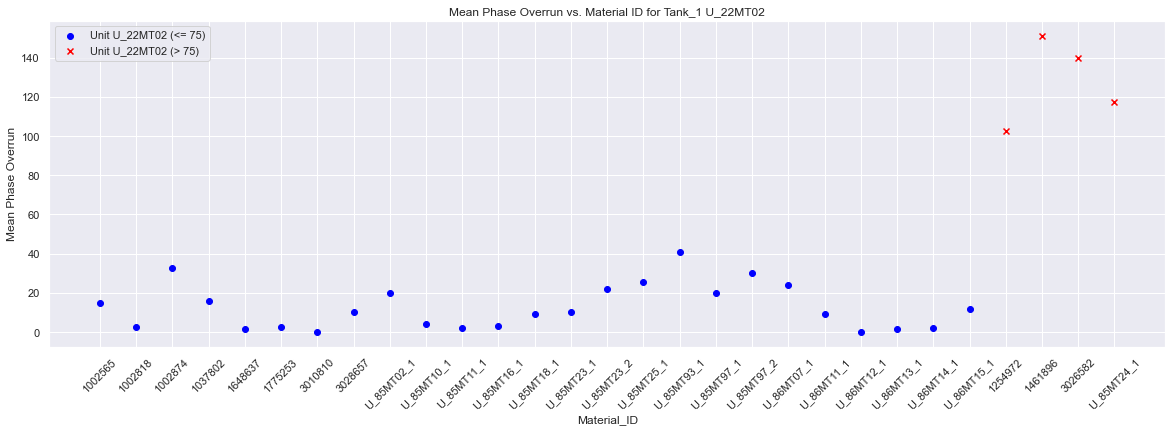

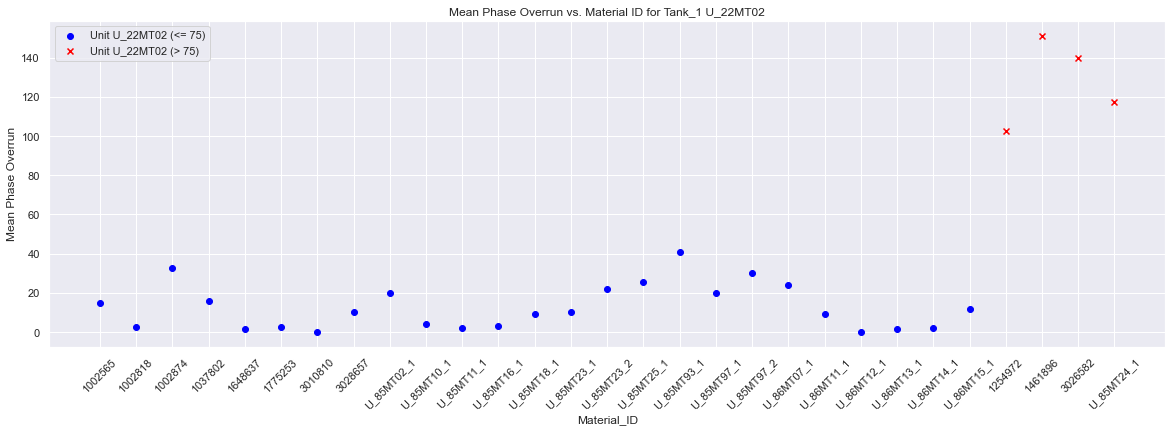

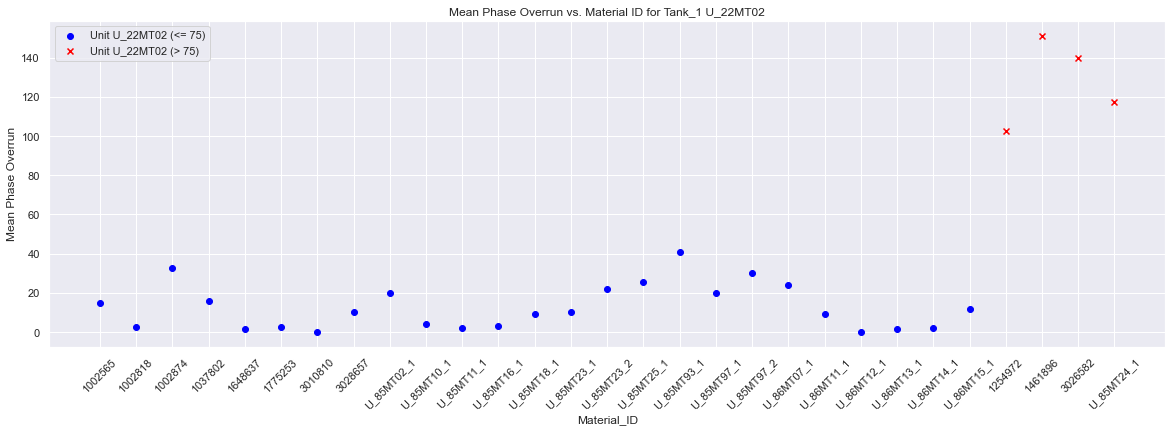

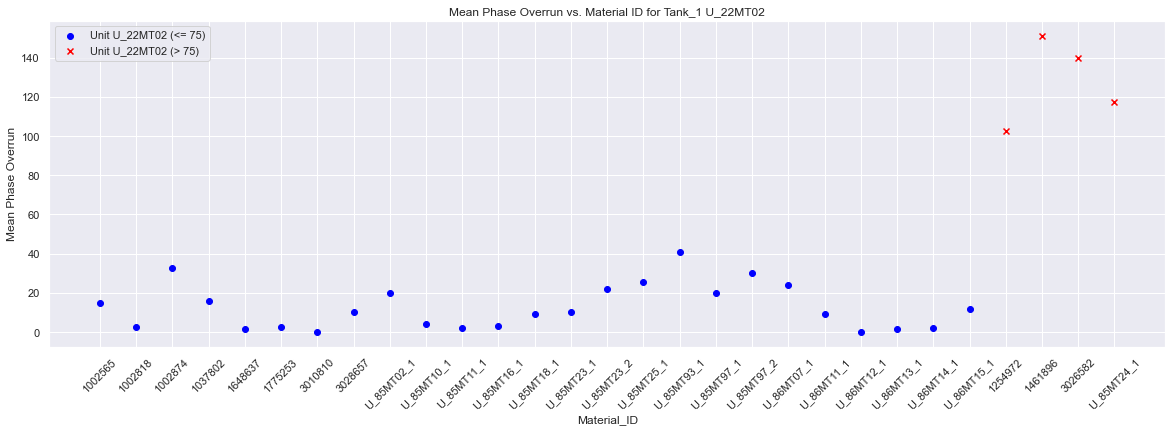

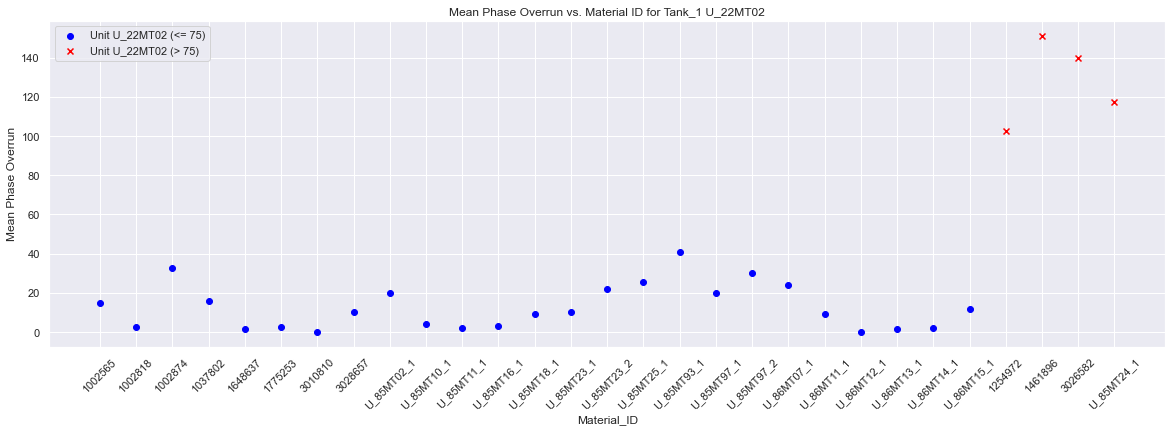

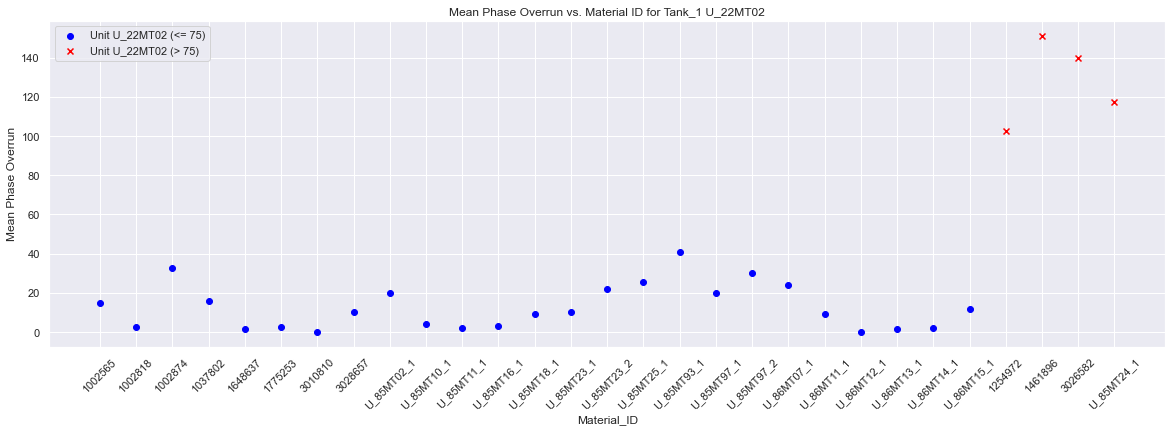

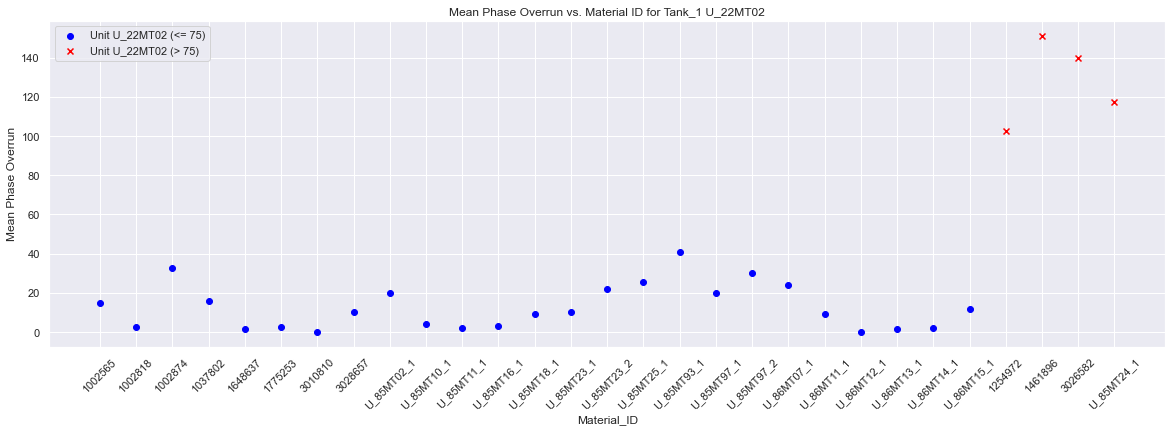

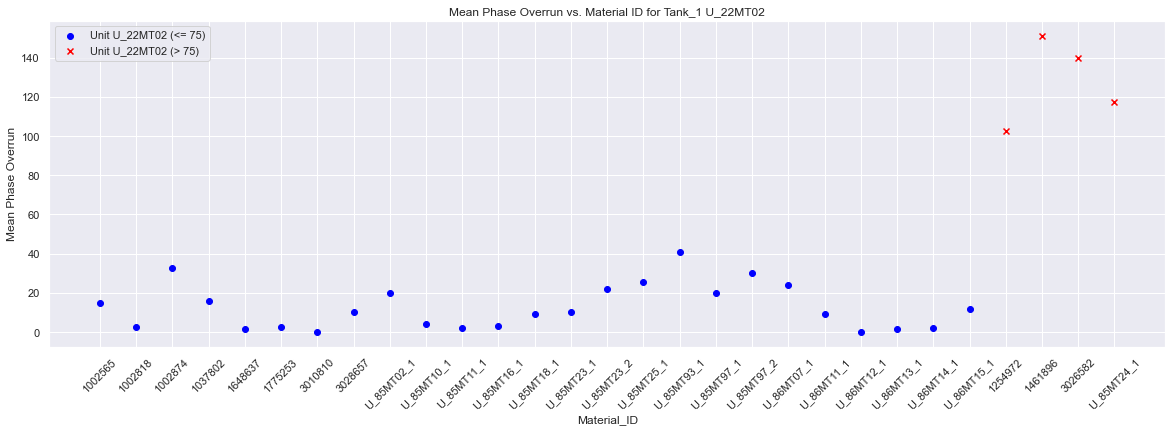

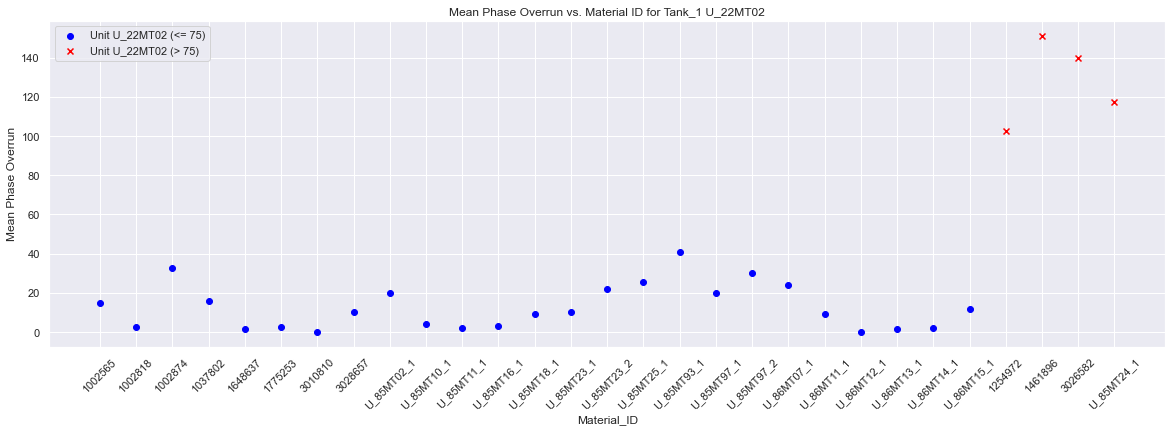

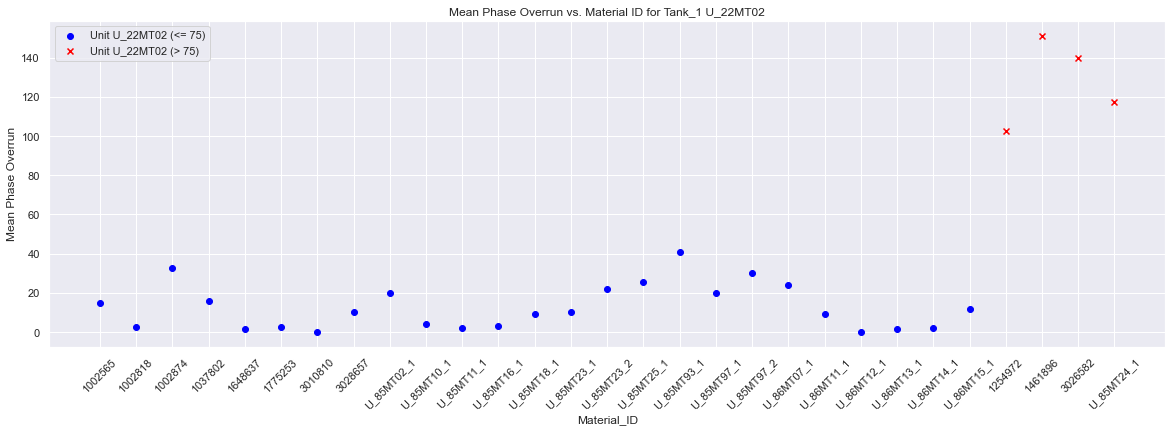

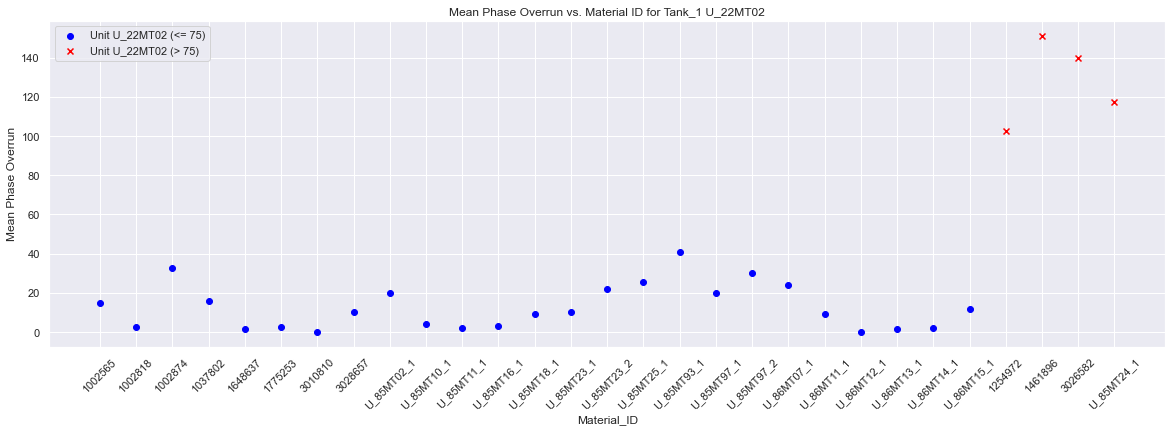

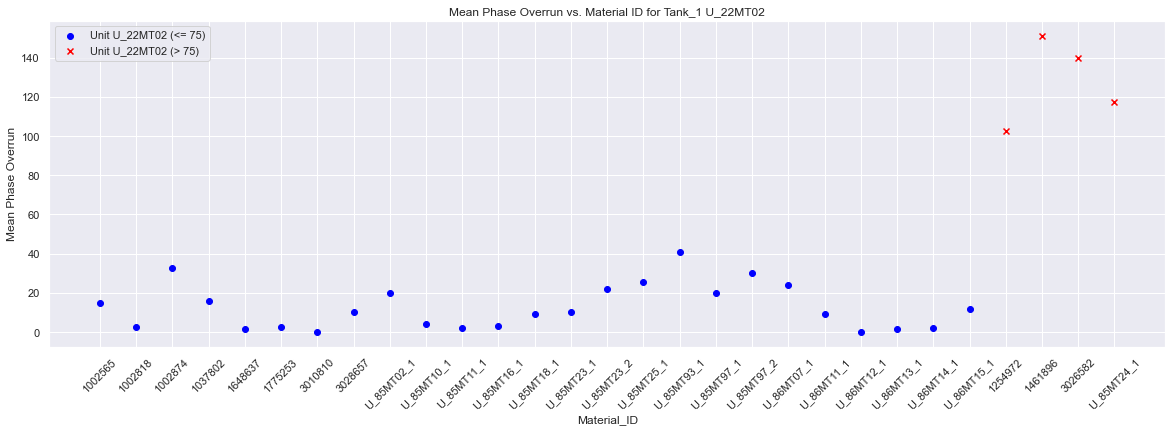

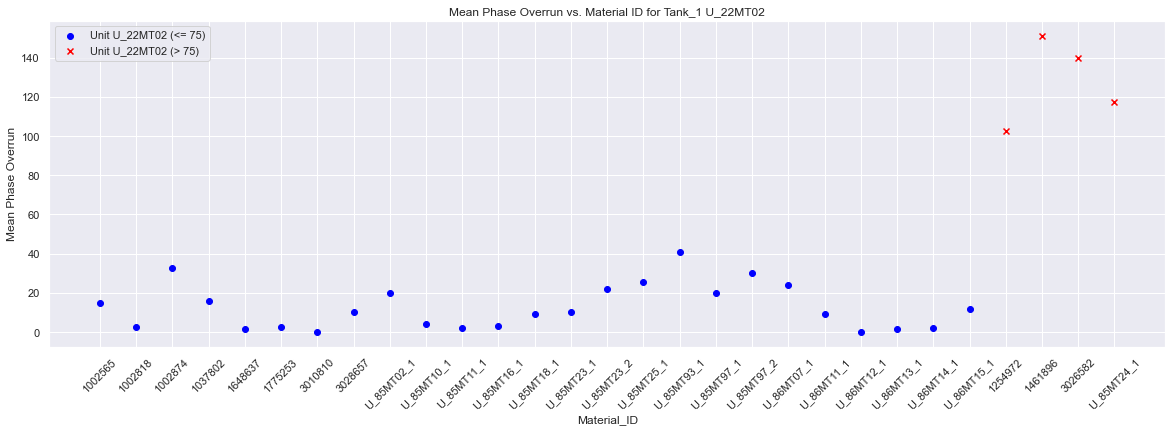

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(uploaded_df)

# Group data by 'unit' and calculate the mean phase overrun for each unit and material combination
grouped_data = df.groupby(['Tank_1','Material_ID'])['Phase_overrun'].mean().reset_index()

# Define the threshold value above which points will be colored differently
threshold = 75  # Adjust this value as needed

# Create a separate plot for each unit
units = grouped_data['Tank_1'].unique()
for Tank_1 in units:
    unit_data = grouped_data[grouped_data['Tank_1'] == unit]
    
    plt.figure(figsize=(20, 6))
    
    # Scatter plot for points below threshold
    plt.scatter(unit_data[unit_data['Phase_overrun'] <= threshold]['Material_ID'],
                unit_data[unit_data['Phase_overrun'] <= threshold]['Phase_overrun'],
                label=f'Unit {unit} (<= {threshold})', color='blue')
    
    # Scatter plot for points above threshold
    plt.scatter(unit_data[unit_data['Phase_overrun'] > threshold]['Material_ID'],
                unit_data[unit_data['Phase_overrun'] > threshold]['Phase_overrun'],
                label=f'Unit {unit} (> {threshold})', color='red', marker='x')
    
    plt.xlabel('Material_ID')
    plt.ylabel('Mean Phase Overrun')
    plt.title(f'Mean Phase Overrun vs. Material ID for Tank_1 {unit}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

## Graphing the CSV file: examining the various relationships between the variables

In [ ]:
uploaded_df[['Material','Tank']].groupby(by='Tank_1').count().plot.bar()

plt.title('Material by Tank')
plt.xlabel('Tank')
plt.ylabel('Material')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# uploaded_df

uploaded_df[['Phase_overrun','Tank']].groupby(by='Tank').count().plot.bar()

plt.title('Phase_overrun by Tank')
plt.xlabel('Tank')
plt.ylabel('Phase_overrun')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# uploaded_df

df_GumAddition[['Phase_overrun','Material_ID']].groupby(by='Material_ID').count().plot.bar()
#plt.figure(figsize=(10, 6))
plt.title('Phase_overrun by Tank')
plt.xlabel('Material_ID')
plt.ylabel('Phase_overrun')
#plt.xticks(rotation = 90)
#plt.show()

In [ ]:
# Bar Chart (Categorical Variables)
plt.figure(figsize=(20, 6))
sns.countplot(data=uploaded_df, x='Material')
plt.xticks(rotation=45)
plt.title('Distribution of Materials')
plt.show()

In [ ]:
# Histogram (Numeric Variables)
plt.figure(figsize=(10, 6))
plt.hist(df_TankQuantity['Quantity'], bins=20)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

In [ ]:
# Pair Plot (Scatter Matrix)
sns.pairplot(df_TankQuantity[['Quantity', 'Phase_duration', 'Phase_overrun']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

In [ ]:
# Aggregated Bar Plot
plt.figure(figsize=(20, 6))
agg_df = df_TankQuantity.groupby('Material')['Phase_duration'].mean().reset_index()
sns.barplot(data=agg_df, x='Material', y='Phase_duration')
plt.xticks(rotation=45)
plt.xlabel('Material')
plt.ylabel('Mean Phase Duration')
plt.title('Mean Phase Duration by Material')
plt.show()

In [ ]:
# Aggregated Bar Plot
plt.figure(figsize=(20, 6))
agg_df = df_TankQuantity.groupby('Material')['Phase_overrun'].mean().reset_index()
sns.barplot(data=agg_df, x='Material', y='Phase_overrun')
plt.xticks(rotation=45)
plt.xlabel('Material')
plt.ylabel('Mean Phase_overrun')
plt.title('Mean Phase_overrun by Material')
plt.show()

In [ ]:
# Aggregated Bar Plot
plt.figure(figsize=(20, 6))
agg_df = df_TankQuantity.groupby('Tank')['Phase_overrun'].mean().reset_index()
sns.barplot(data=agg_df, x='Tank', y='Phase_overrun')
plt.xticks(rotation=45)
plt.xlabel('Tank')
plt.ylabel('Mean Phase_overrun')
plt.title('Mean Phase_overrun by Tank')
plt.show()